# AceleraDev DataScience 

#### Dados obtidos do seguinte desafio do Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
# Reading the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.shape

(1460, 81)

## Análise dos Dados

### 1. Seleção por completude

In [7]:
# Creating an auxiliary dataframe to analyze the consistency of the variables
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})

cons.head()

,colunas,tipo,missing,size,unicos
Id,Id,int64,0,1460,1460
MSSubClass,MSSubClass,int64,0,1460,15
MSZoning,MSZoning,object,0,1460,5
LotFrontage,LotFrontage,float64,259,1460,110
LotArea,LotArea,int64,0,1460,1073


In [8]:
cons['percentual'] = round(cons['missing'] / cons['size'], 2)
cons.head()

,colunas,tipo,missing,size,unicos,percentual
Id,Id,int64,0,1460,1460,0.00
MSSubClass,MSSubClass,int64,0,1460,15,0.00
MSZoning,MSZoning,object,0,1460,5,0.00
LotFrontage,LotFrontage,float64,259,1460,110,0.18
LotArea,LotArea,int64,0,1460,1073,0.00


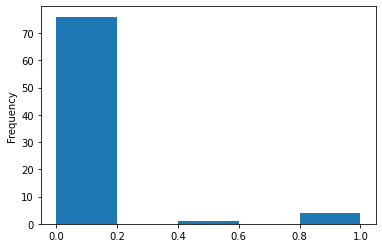

In [9]:
cons.percentual.plot.hist(bins=5);

### 2. Removendo colunas com dados missing

In [10]:
print('Contagem de colunas com ATÉ 20% de dados faltantes:', cons[cons.percentual < 0.2].shape[0])
print('Contagem de colunas com 0% de dados faltantes:',  cons[cons.percentual == 0].shape[0])

Contagem de colunas com ATÉ 20% de dados faltantes: 76
Contagem de colunas com 0% de dados faltantes: 63


In [11]:
cons[cons.percentual == 0]['tipo'].value_counts()

int64     35
object    28
Name: tipo, dtype: int64

In [12]:
# Creating a column where is 'completa' if the column do not have missing values and 'faltante' otherwise
cons['completa'] = ['completa' if x == 0 else 'faltante' for x in cons['percentual']]
cons.head()

,colunas,tipo,missing,size,unicos,percentual,completa
Id,Id,int64,0,1460,1460,0.00,completa
MSSubClass,MSSubClass,int64,0,1460,15,0.00,completa
MSZoning,MSZoning,object,0,1460,5,0.00,completa
LotFrontage,LotFrontage,float64,259,1460,110,0.18,faltante
LotArea,LotArea,int64,0,1460,1073,0.00,completa


In [13]:
# Keep only with the complete (without missing valoues) columns in the dataset
mantem = list(cons[cons['completa'] == 'completa']['colunas'])
df = df[mantem]
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
colunas_numericas = list(cons[((cons['tipo'] != 'object') &
                              (cons['completa'] == 'completa'))]['colunas'])
colunas_numericas

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### 3. Exploração

Id


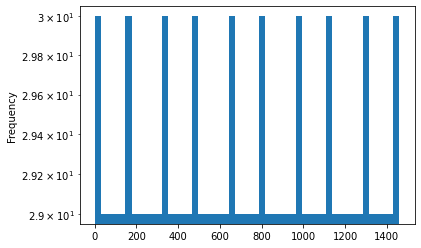

MSSubClass


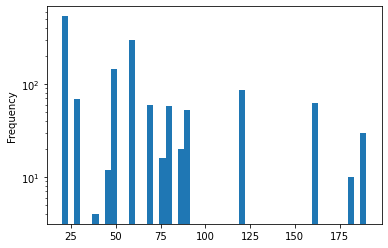

LotArea


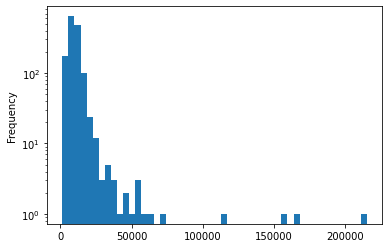

OverallQual


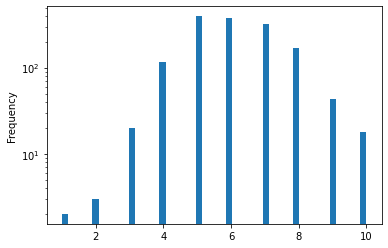

OverallCond


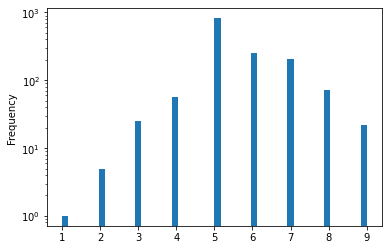

YearBuilt


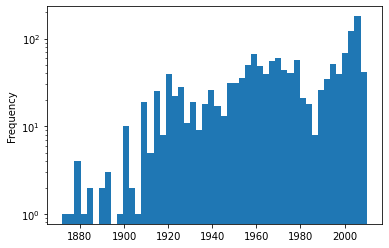

YearRemodAdd


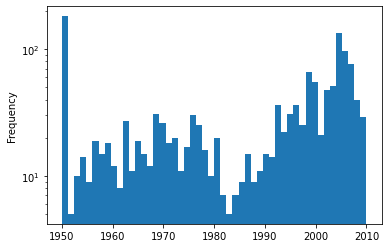

BsmtFinSF1


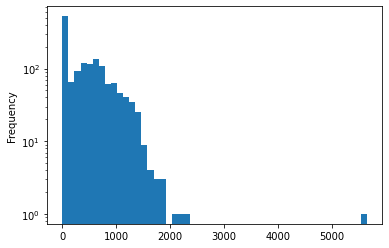

BsmtFinSF2


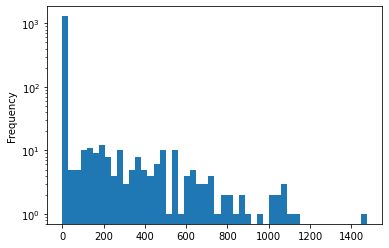

BsmtUnfSF


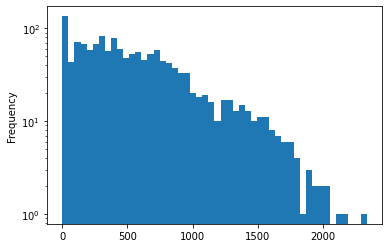

TotalBsmtSF


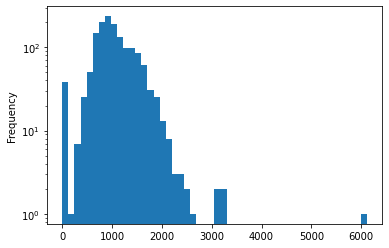

1stFlrSF


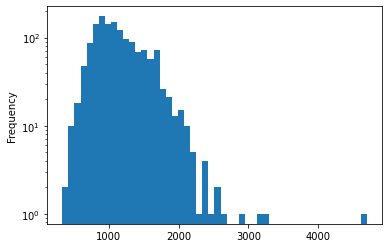

2ndFlrSF


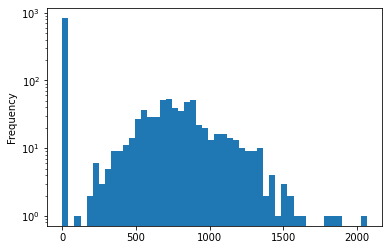

LowQualFinSF


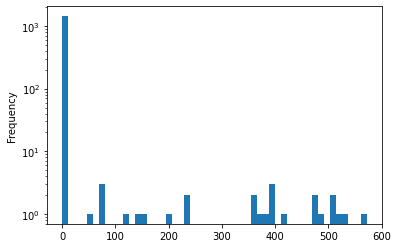

GrLivArea


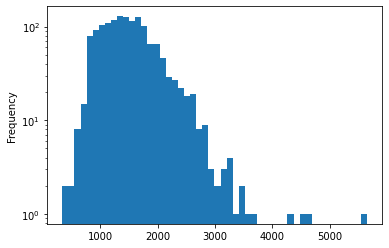

BsmtFullBath


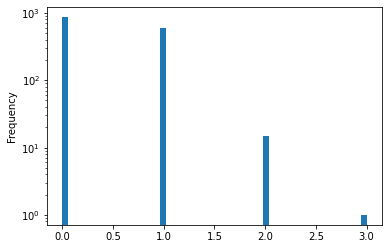

BsmtHalfBath


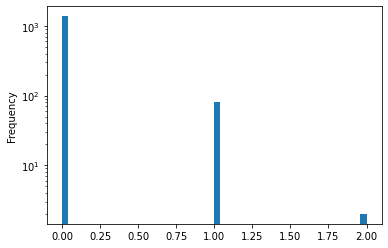

FullBath


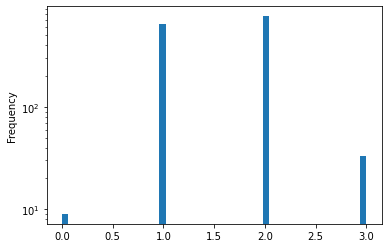

HalfBath


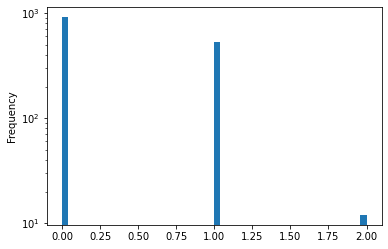

BedroomAbvGr


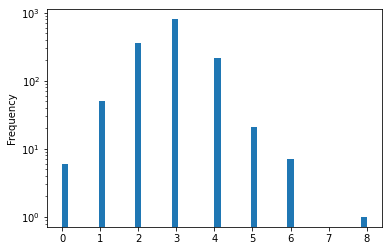

KitchenAbvGr


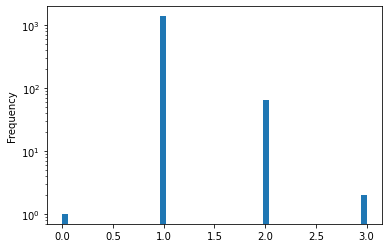

TotRmsAbvGrd


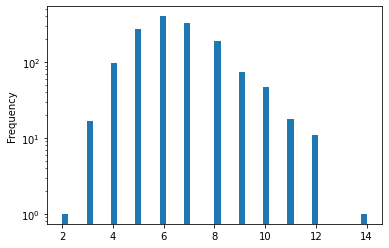

Fireplaces


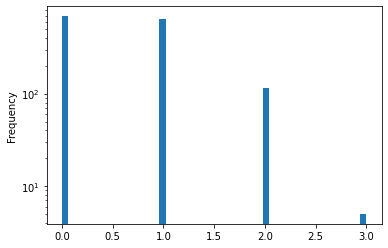

GarageCars


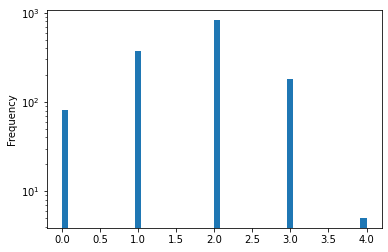

GarageArea


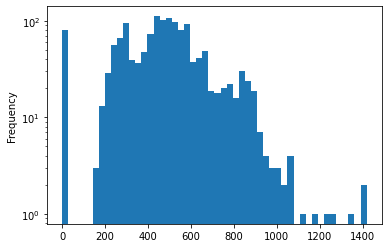

WoodDeckSF


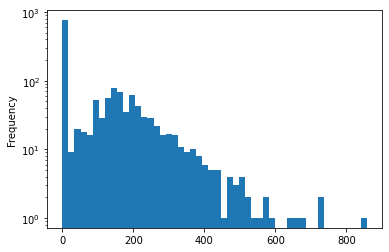

OpenPorchSF


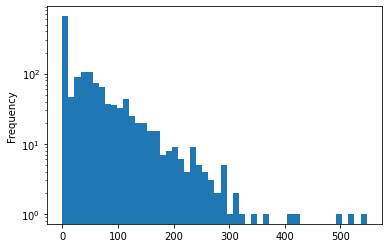

EnclosedPorch


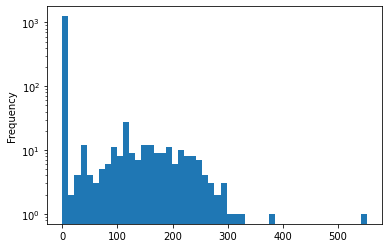

3SsnPorch


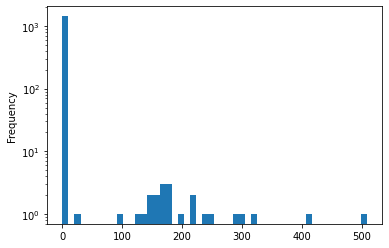

ScreenPorch


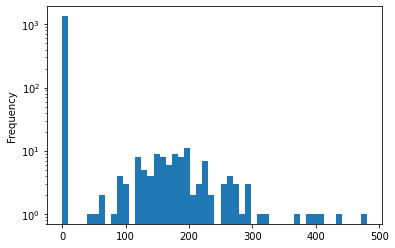

PoolArea


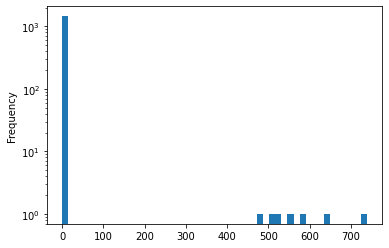

MiscVal


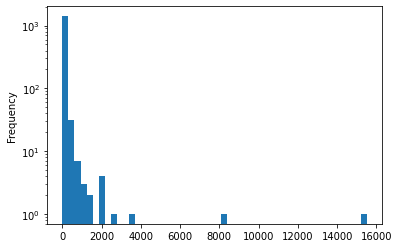

MoSold


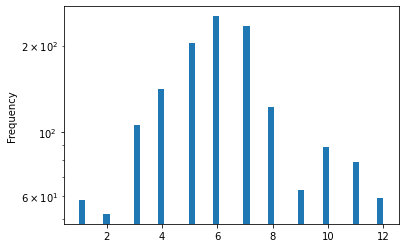

YrSold


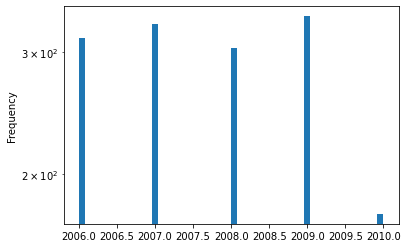

SalePrice


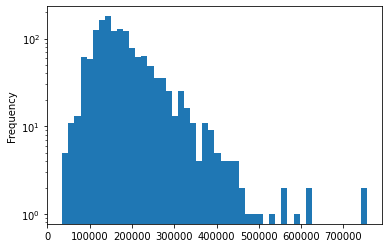

In [15]:
# Univariate analysis
for coluna in colunas_numericas:
    print(coluna)
    df[coluna].plot.hist(bins=50, log=True)
    plt.show()

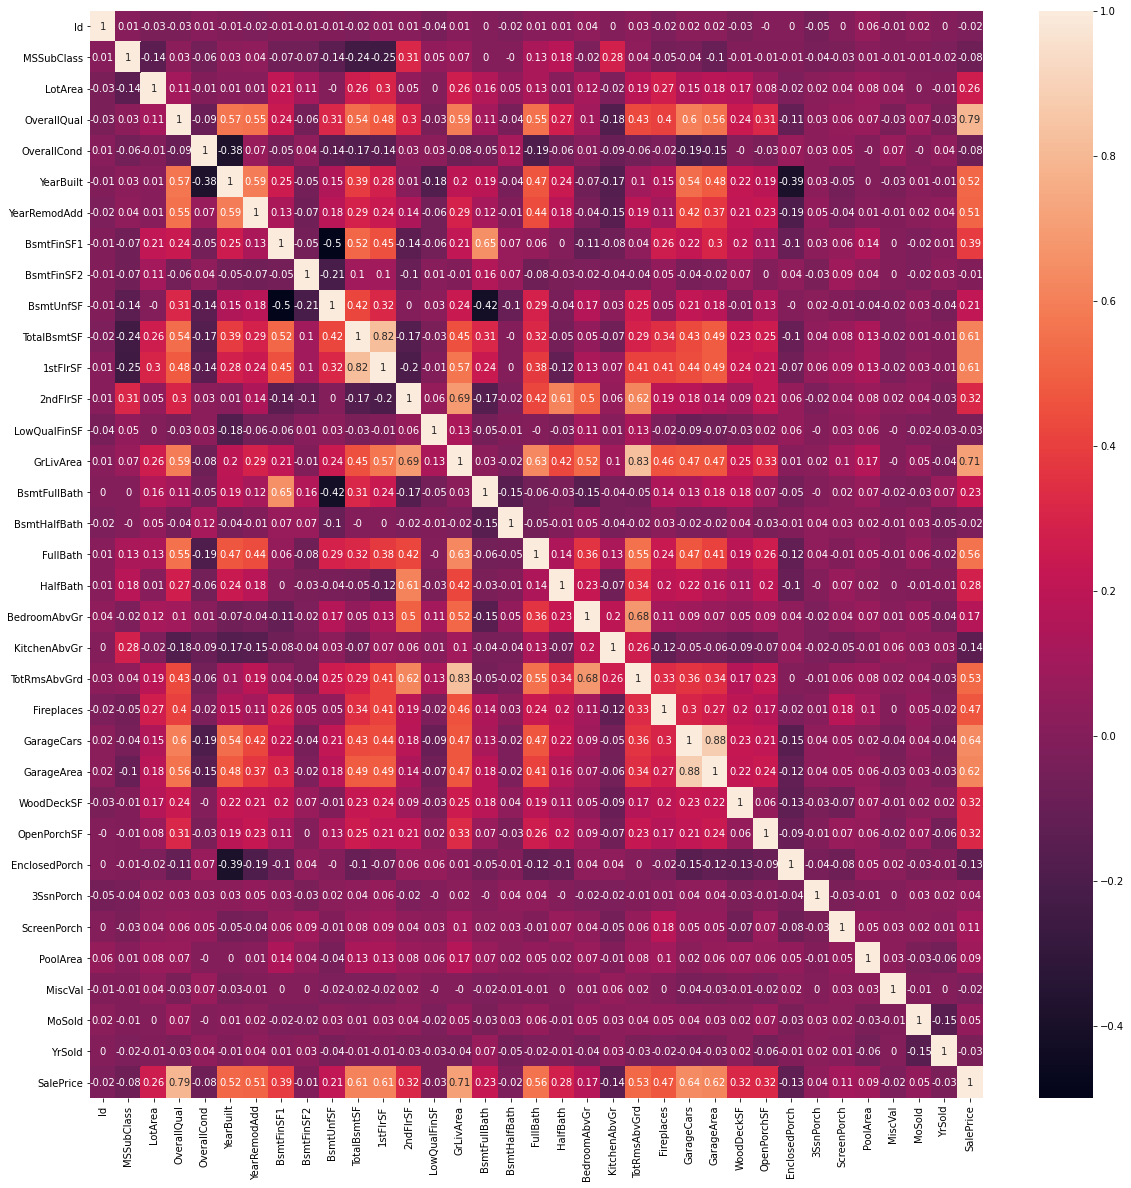

In [16]:
#Analyzing the correlation between numerical variables
plt.figure(figsize = (20,20))
sns.heatmap(df[colunas_numericas].corr().round(2), annot=True);

In [17]:
# Features most correlated with the target feature ('SalePrice')
correlacionadas = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

### 4. Analisando as features com yellowbrick

In [30]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     |████████████████████████████████| 263 kB 343 kB/s eta 0:00:01
  Using cached scikit_learn-0.23.1-cp36-cp36m-manylinux1_x86_64.whl (6.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Removing the 'Id' column
colunas_numericas.remove('Id')
df = df[colunas_numericas]

In [20]:
# Selecting the output(y) of the train and the input (X)
y_train = df['SalePrice']
X_train = df.drop(columns='SalePrice')

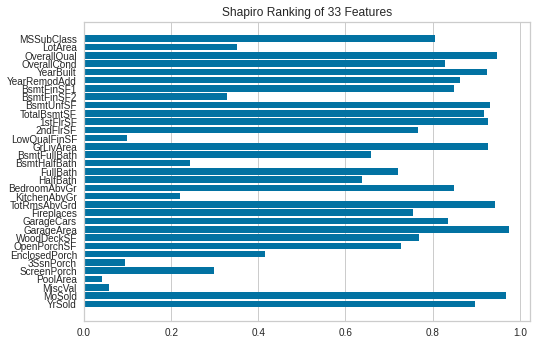

In [24]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_train, y_train)           
visualizer.transform(X_train)        
visualizer.show();

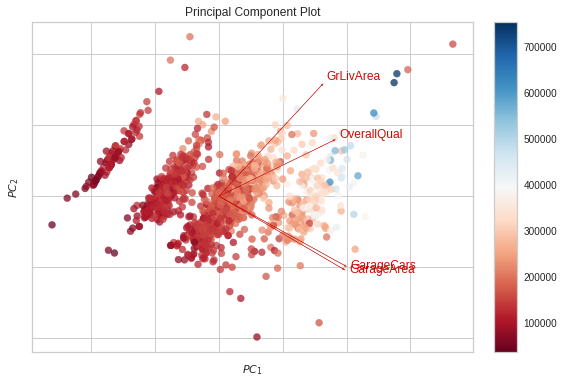

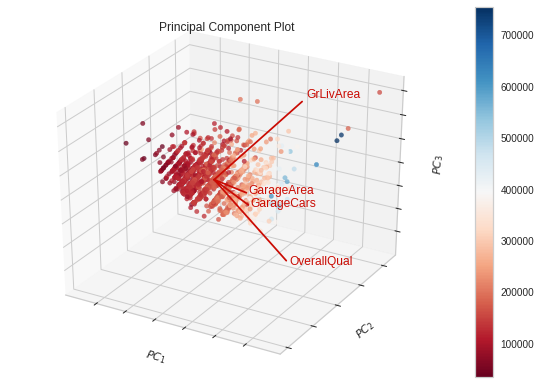

In [34]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train[correlacionadas], y_train)
visualizer.show();

visualizer2 = PCA(scale=True, proj_features=True, projection=3)
visualizer2.fit_transform(X_train[correlacionadas], y_train)
visualizer2.show();

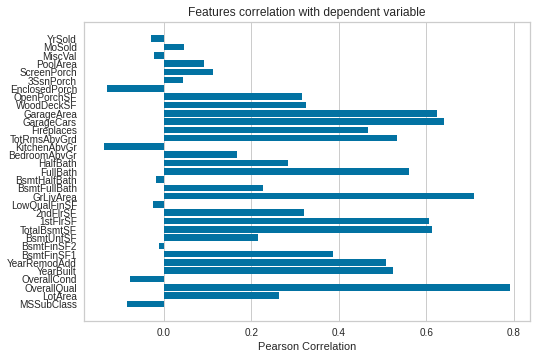

In [36]:
from yellowbrick.target import FeatureCorrelation

features = list(X_train.columns)

visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X_train, y_train)        
visualizer.show();

### 5. Treinando o modelo

In [36]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.2 MB 6.5 MB/s eta 0:00:01
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=a06c24060e74cb4e85f9e51f5e3f55cf62c260de007fc4aedc7c860cdc0e3012
  Stored in directory: /Users/tuliosouza/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()

In [82]:
# Train the data
reg.fit(X_train, y_train);

In [53]:
# Showing the columns used in the train
colunas_treinamento = X_train.columns
colunas_treinamento

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [61]:
# Reading the test files
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')

X_test.shape, y_test.shape

((1459, 80), (1459, 2))

In [62]:
y_test = y_test['SalePrice']
y_test.head()

0    169277.052498
1    187758.393989
2    183583.683570
3    179317.477511
4    150730.079977
Name: SalePrice, dtype: float64

In [63]:
# Completing the NaN values of the test with the mean of the column feature
X_test = X_test[colunas_treinamento].fillna(df[colunas_treinamento].mean())

In [64]:
# Predicting the test data, generating the y_pred
y_pred = reg.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error

In [67]:
# Comparing the value predicted of the test with the original value of the test (y_pred and y_test)
erro_normal = mean_squared_error(y_pred=y_pred, y_true=y_test)
erro_normal

4647194215.337288

### 6. Aplicando o Feature Selection

In [69]:
from sklearn.feature_selection import RFE

In [70]:
# Recursive Feature Elimination
rfe = RFE(reg)

In [83]:
# Fit only the train data (NEVER FIT THE TEST DATA)
rfe.fit(X_train, y_train);

In [84]:
pd.DataFrame({'Nome da Coluna': X_train.columns,
              'Escolhida': rfe.get_support(),
              'Coeficiente': pd.Series(reg.coef_)})

,Nome da Coluna,Escolhida,Coeficiente
0,MSSubClass,True,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,True,4418.794796
4,YearBuilt,True,346.653503
5,YearRemodAdd,True,137.073924
6,BsmtFinSF1,False,11.833598
7,BsmtFinSF2,False,-2.728260
8,BsmtUnfSF,False,0.787735
9,TotalBsmtSF,False,9.893072


In [79]:
# Creating a new train and test set with just the relevant features by RFE 
X_train_importante = rfe.transform(X_train)
X_test_importante = rfe.transform(X_test)

In [86]:
# Fit the new train set
reg.fit(X_train_importante, y_train);

In [91]:
# Predict again, now with the rfe use
y_pred_imp = reg.predict(X_test_importante)

In [92]:
# Comparing the value predicted of the test with the original value of the test (y_pred and y_test)
erro_imp = mean_squared_error(y_pred=y_pred_imp, y_true=y_test)
erro_imp

4628516097.925274

/home/fuchs/codenation/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/fuchs/codenation/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


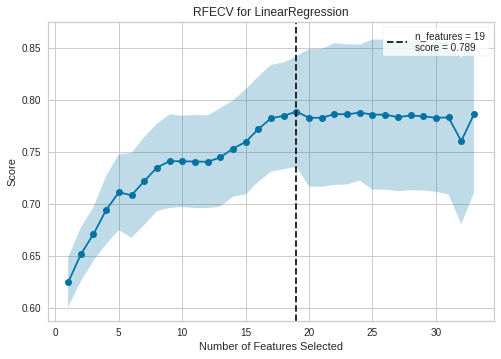

In [101]:
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(reg)

# Fit the data to the visualizer
visualizer.fit(X_train, y_train)

# Finalize and render the figure
visualizer.show();           

### 7. Aplicando PCA

In [102]:
from sklearn.decomposition import PCA

In [103]:
# Running PCA with 95%
pca = PCA(0.95)

In [106]:
# Running PCA in X_train
pca.fit(X_train);

In [107]:
pca.explained_variance_ratio_

array([0.98511677])

In [109]:
# Transforming the train and test data from the PCA format
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [110]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train);

In [111]:
# Predict again, now with the PCA use
y_pred_pca = reg.predict(X_test_pca)

In [113]:
erro_pca = mean_squared_error(y_pred=y_pred_pca, y_true=y_test)
erro_pca

134744447.42149565

In [121]:
# Comparing the error value between all features, RFE features and PCA features
error = pd.DataFrame({'erro' : [erro_normal, erro_imp, erro_pca]}).head()

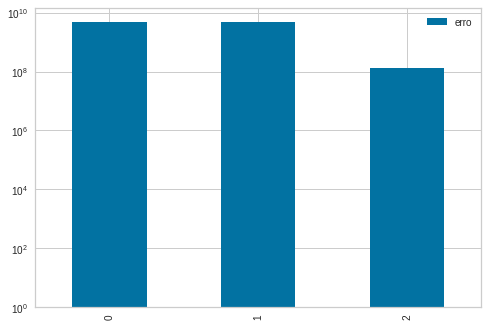

In [124]:
# Comparing the error value between all features, RFE features and PCA features
error.plot(kind='bar', log=True);